In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv(r"./Titanic-Dataset.csv")
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

In [27]:
imputer = SimpleImputer(strategy='median')
#For Age and Fare columns, missing values are replaced with the median of each column.
df[['Age','Fare']] = imputer.fit_transform(df[['Age','Fare']])
#For the Embarked column, missing values are filled with the most frequent value (mode).
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
# LabelEncoder is used to convert the Embarked column into numerical format. one hot encoding
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
# StandardScaler is used to normalize Age and Fare columns to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
#pd.get_dummies is used for one-hot encoding the Pclass column.
df =pd.get_dummies(df,columns=['Pclass'],drop_first=True)

/tmp/ipykernel_121940/2259628745.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


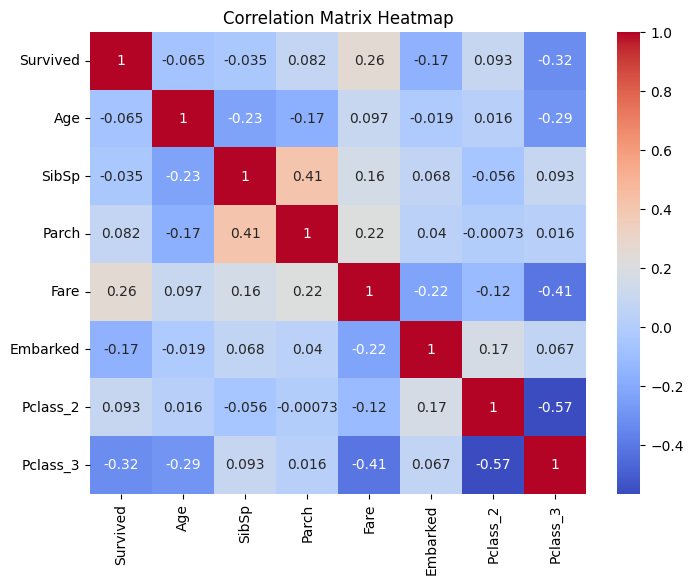

In [28]:
#Correlation Matrix Heatmap
plt.figure(figsize=(8,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
#split the data set
X = df.drop('Survived',axis=1)
y= df['Survived']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
#train the model
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[78 27]
 [35 39]]
Accuracy: 0.6536312849162011


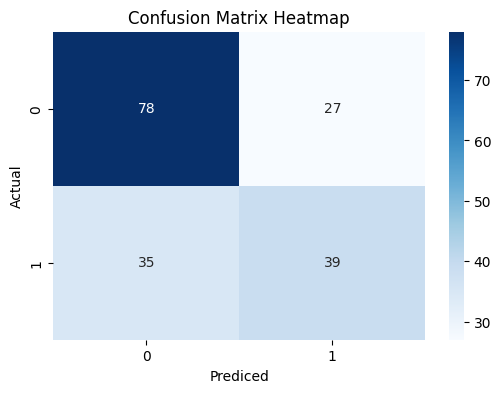

In [23]:
#Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Prediced')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()